In [19]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/PyTorch/Colab Notebooks')

#Defining a Tensor Datatype

In [2]:
import torch

# Default tensor datatype is float32
x = torch.ones(2, 2)
print(x)
print(x.dtype)

# Change Default tensor Datatype
x = torch.zeros(2, 2, dtype=torch.uint8)
print(x)
print(x.dtype)



tensor([[1., 1.],
        [1., 1.]])
torch.float32
tensor([[0, 0],
        [0, 0]], dtype=torch.uint8)
torch.uint8


# Change a Tensor Datatype

In [3]:
x = torch.zeros(1, dtype=torch.uint8)
print(x)
print(x.dtype)

x = x.type(torch.float32)
print(x)
print(x.dtype) 

tensor([0], dtype=torch.uint8)
torch.uint8
tensor([0.])
torch.float32


#Converting tensors into NumPy arrays

In [4]:
x = torch.rand(2, 2, dtype=torch.float32)
print(x.dtype)

x = x.numpy()
print(x.dtype)

torch.float32
float32


#Converting NumPy arrays into Tensors 

In [5]:
import numpy as np
x = np.ones((1, 1), dtype = np.float32)
print(x.dtype)

x = torch.from_numpy(x)
print(x.dtype)


float32
torch.float32


#Moving tensors between devices

In [6]:
x = torch.tensor([1, 2], dtype=torch.float32)
print(x.device)

if torch.cuda.is_available():
  device=torch.device('cuda:0')
x=x.to(device)
print(x.device)


cpu
cuda:0



# Load Train/Validation/Test Data with Labels

In [7]:

# The PyTorch torchvision package provides multiple popular datasets.
import torchvision
import torch

# train=True to get train data otherwise it would get test data
# download=True to download data to working directory
path2data = './data'
train_data = torchvision.datasets.MNIST(path2data, train=True, download=True)  

# Load data and targets
x_train, y_train = train_data.data, train_data.targets
print(x_train.shape)
print(y_train.shape)

val_data = torchvision.datasets.MNIST(path2data, train=False, download=True)  
# Load data and targets
x_val, y_val = val_data.data, val_data.targets
print(x_val.shape)
print(y_val.shape)

# Add a new dimension to make a tensor B*C*H*W
if len(x_train.shape)==3:
  x_train = torch.unsqueeze(x_train, 1)
print(x_train.shape)

if len(x_val.shape)==3:
  x_val = torch.unsqueeze(x_val, 1)
print(x_val.shape)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Done!
torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])
torch.Size([10000])
torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])


#Display the Images





torch.Size([3, 152, 242])


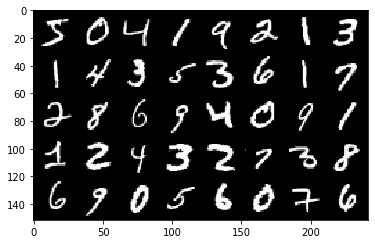

In [8]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def show(img):
  # convert tensor to numpy array
  npimg = img.numpy()
  # Convert to H*W*C shape
  npimg_tr=np.transpose(npimg, (1, 2, 0))
  plt.imshow(npimg_tr, interpolation='nearest')

# make a grid of 40 images, 8 images per row
x_grid=utils.make_grid(x_train[:40], nrow=8, padding=2)
print(x_grid.shape)
# call helper function
show(x_grid)



#Data Augumentation/Transformation

Text(0.5, 1.0, 'Augumentation')

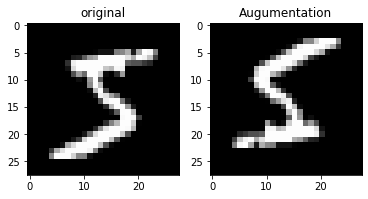

In [9]:
data_aug = torchvision.transforms.Compose([torchvision.transforms.RandomHorizontalFlip(p=1),
                                          torchvision.transforms.RandomVerticalFlip(p=1),
                                          torchvision.transforms.ToTensor(),
                                           ])

# get a sample image from training dataset
img = train_data[0][0]
# transform sample image
img_aug=data_aug(img)
# convert tensor to numpy array
img_aug_np=img_aug.numpy()

#show original and transformed images
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("original")
plt.subplot(1, 2, 2)
plt.imshow(img_aug_np[0], cmap="gray");
plt.title("Augumentation")

#Wrapping tensors into a dataset

In [10]:
from torch.utils.data import TensorDataset
# wrap tensors into a dataset
train_ds = TensorDataset(x_train, y_train)
val_ds = TensorDataset(x_val, y_val)
for x,y in train_ds:
  print(x.shape, y.item())
  break

torch.Size([1, 28, 28]) 5


#Creating data loaders

In [11]:
#To easily iterate over the data during training, we can create a data loader using the DataLoader class, as follows:
from torch.utils.data import DataLoader
# create a data loader from dataset
train_dl = DataLoader(train_ds, batch_size=8)
val_dl = DataLoader(val_ds, batch_size=8)
# iterate over batches
for xb, yb in train_dl:
  print(xb.shape)
  print(yb.shape)
  break

torch.Size([8, 1, 28, 28])
torch.Size([8])


# Building models
A model is a collection of connected layers that process the inputs to generate the outputs. You can use the nn package to define models. **The nn package** is a collection of modules that provide common deep learning layers. A module or layer of nn receives input tensors, computes output tensors, and holds the weights, if any. There are two methods we can use to define models in PyTorch: **nn.Sequential** and **nn.Module**.

In [12]:
# Defining a linear layer. Linear Layer is a dense layer.
# Let's create a linear layer and print out its output size:
from torch import nn
# input tensor dimension 64*1000
input_tensor = torch.randn(64, 1000)
# linear layer with 1000 inputs and 100 outputs
linear_layer = nn.Linear(1000, 100)
# output of the linear layer
output = linear_layer(input_tensor)
print(output.shape)

torch.Size([64, 100])


# Defining models using **nn.Sequential** package.

In [13]:
from torch import nn

model = nn.Sequential(nn.Linear(in_features=4, out_features=5, bias=True),
                      nn.ReLU(),
                      nn.Linear(in_features=5, out_features=1),
                      )
print(model)


Sequential(
  (0): Linear(in_features=4, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


# Defining models using **nn.Module** Package
+ This method provides better flexibitlity to set customized model.
+ In this method we define a model by subclassing the `nn.Module` class.
+ Layers are specified in `__init__ ` method of the class.
+ `Inputs` are passed to layers in `forward` method of the class.

Lets implement a model with 2 convolutional layers and 2 fully connected layers with `nn.Module` class.


In [14]:
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()

  def forward(self, x):
    pass

def __init__(self):
  super(Model, self).__init__()
  self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
  self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, return_indices=False, ceil_mode=False)
  self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
  self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, return_indices=False, ceil_mode=False)

  self.fc1 = nn.Linear(in_features=4*4*50, out_features=500, bias=True)
  self.fc2 = nn.Linear(in_features=500, out_features=10, bias=True)
  

def forward(self, x):
  x = self.conv1(x)
  x = F.relu(x)
  x = self.pool1(x)
  x = self.conv2(x)
  x = F.relu(x)
  x = self.pool2(x)
  x = x.view(-1, 4*4*50)
  x = self.fc1(x)
  x = F.relu(x)
  x = self.fc2(x)
  x = F.log_softmax(x, dim=1)
  return x

# override both init and forward functions
Model.__init__ = __init__
Model.forward = forward

model = Model()
print(model)


# default model device
print(next(model.parameters()).device)

# move the model to cuda device
device = torch.device("cuda:0")
model.to(device)
print(next(model.parameters()).device)


Model(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)
cpu
cuda:0


In [15]:
!pip install torchsummary
from torchsummary import summary
summary(model, input_size = (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 24, 24]             520
         MaxPool2d-2           [-1, 20, 12, 12]               0
            Conv2d-3             [-1, 50, 8, 8]          25,050
         MaxPool2d-4             [-1, 50, 4, 4]               0
            Linear-5                  [-1, 500]         400,500
            Linear-6                   [-1, 10]           5,010
Total params: 431,080
Trainable params: 431,080
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.14
Params size (MB): 1.64
Estimated Total Size (MB): 1.79
----------------------------------------------------------------


# Defining the loss function and optimizer

In [16]:
                                                  # Defining a loss function and test it on a minibatch
from torch import nn
# define negative log-likelihood loss:
loss_func = nn.NLLLoss(reduction="sum")
# test the loss function on a mini-batch

for x_mb, y_mb in train_dl:
  x_mb = x_mb.type(torch.float32).to(device)
  y_mb = y_mb.to(device)
  # get model predictions
  pred_mb = model(x_mb)
  #calculate loss value
  loss = loss_func(pred_mb, y_mb) 
  print(loss.item())
  break

# compute the gradient w.r.t model parameters
gradient = loss.backward()

                                                  # Defining the Optimizer
from torch import optim
opt = optim.Adam(model.parameters(), lr=1e-4)
opt.step()
opt.zero_grad()

136.55020141601562


# Training and evaluation

In [17]:
def loss_batch(loss_func, x_mb, y_mb, y_pmb, opt=None):
  # obtain loss
  loss = loss_func(y_pmb, y_mb)
  # obtain performance metric
  metric_mb = metrics_batch(y_mb, y_pmb)
  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()
  return loss.item(), metric_mb

def metrics_batch(target, output):
  # obtain output class
  pred = output.argmax(dim=1, keepdim=True)
  # compare output class with target class
  corrects=pred.eq(target.view_as(pred)).sum().item()
  return corrects

def loss_epoch(model, loss_func, dataset_dl, opt=None):
  loss = 0.0
  metric = 0.0
  len_data=len(dataset_dl.dataset)
  for x_mb, y_mb in dataset_dl:
    x_mb = x_mb.type(torch.float).to(device)
    y_mb = y_mb.to(device)
    # obtain model output
    y_pmb = model(x_mb)
    loss_mb, metric_mb = loss_batch(loss_func, x_mb, y_mb, y_pmb, opt)
    loss+=loss_mb
    if metric_mb is not None:
      metric+=metric_mb
  loss/=len_data
  metric/=len_data
  return loss, metric


def train_val(epochs, model, loss_func, opt, train_dl, val_dl):
  for epoch in range(epochs):
    model.train()
    train_loss, train_metric = loss_epoch(model, loss_func, train_dl, opt)
    model.eval()
    with torch.no_grad():
      val_loss, val_metric = loss_epoch(model, loss_func, val_dl)
    accuracy = 100*val_metric
    # print("epoch: {}, train loss: {.6f}, val loss: {.6f}, accuracy: {.2f}" .format(epoch, train_loss, val_loss, accuracy))
    print("epoch: %d, train loss: %.6f, val loss: %.6f, accuracy: %.2f" %(epoch, train_loss,val_loss,accuracy))
# call train_val function
num_epochs=5
train_val(num_epochs, model, loss_func, opt, train_dl, val_dl)

epoch: 0, train loss: 0.149820, val loss: 0.066362, accuracy: 97.87
epoch: 1, train loss: 0.046769, val loss: 0.040790, accuracy: 98.73
epoch: 2, train loss: 0.027257, val loss: 0.055670, accuracy: 98.54
epoch: 3, train loss: 0.018975, val loss: 0.056856, accuracy: 98.60
epoch: 4, train loss: 0.013876, val loss: 0.056034, accuracy: 98.62


# Storing and loading models

In [20]:
# First, we will store the model parameters or state_dict in a file:
import os
# define path2weights
path2weights="./saved Models/Chapter 01/weights.pt"

# store state_dict to file
torch.save(model.state_dict(), path2weights)

# To load the model parameters from the file, we will define an object of the Net class:
# define model: weights are randomly initiated
_model = Model()

# Then, we will load state_dict from the file:
weights=torch.load(path2weights)

# Next, we will set state_dict to the model:
_model.load_state_dict(weights)

<All keys matched successfully>

In [23]:
# Second Method:
# First, we will store the model in a file:

# define a path2model
path2model="./saved Models/Chapter 01/model.pt"

# store model and weights into a file
torch.save(model, path2model)

# To load the model parameters from the file, we will define an object of the Net class:

# define model: weights are randomly initiated
_model = Model()

# Then, we will load the model from the local file:
_model = torch.load(path2model)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


# Deploying the model

torch.Size([1, 28, 28])
6 6


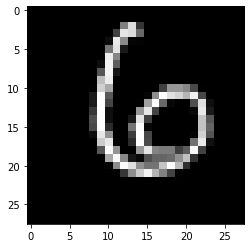

In [26]:
#To deploy the model on a sample image from the validation dataset, we will get a sample tensor:
n=100
x= x_val[n]
y=y_val[n]
print(x.shape)
plt.imshow(x.numpy()[0], cmap="gray")
torch.Size([1, 28, 28])

# we use unsqueeze to expand dimensions to 1*C*H*W
x= x.unsqueeze(0)
# convert to torch.float32
x=x.type(torch.float)
# move to cuda device
x=x.to(device)

# get model output
output=_model(x)
# get predicted class
pred = output.argmax(dim=1, keepdim=True)
print(pred.item(),y.item())